<a href="https://colab.research.google.com/github/Vakhranev/Heritage/blob/main/t-score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

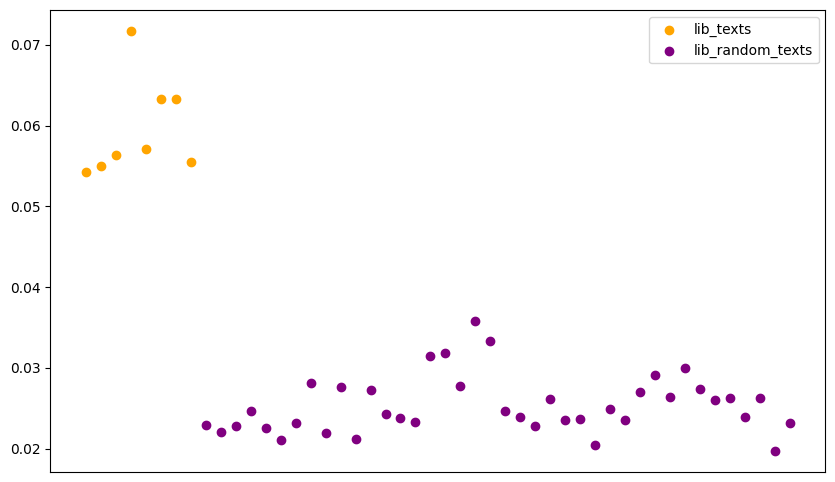

In [3]:
import csv
import json
import matplotlib.pyplot as plt

# Чтение файла lib_texts.json
lib_texts = {}
with open('lib_texts.json', 'r') as file:
    lib_texts_data = json.load(file)
    for text_name, text_info in lib_texts_data.items():
        mmr_rank_unique = text_info.get('mmr_t_score_unique', 0)
        lib_texts[text_name] = mmr_rank_unique

# Чтение файла lib_random_texts.json
lib_random_texts = {}
with open('lib_random_texts.json', 'r') as file:
    lib_random_texts_data = json.load(file)
    for text_name, text_info in lib_random_texts_data.items():
        temporal_text_name = text_name + "_"
        for text_type, text_other in text_info.items():
            if text_type == 'random_texts':
                for text_number, text_else in text_other.items():
                    temporal_text_name += text_number
                    mmr_rank_unique = text_else.get('mmr_t_score_unique')
                    lib_random_texts[temporal_text_name] = mmr_rank_unique
                    temporal_text_name = text_name + "_"

# Теперь у нас есть данные из всех файлов. Мы можем начать построение диаграммы.

# Получение уровней и их соответствующих цветов
levels_colors = {'lib_texts': 'orange', 'lib_random_texts': 'purple'}

# Построение диаграммы
plt.figure(figsize=(10, 6))

# Добавление точек из lib_texts
for i, (text_name, mmr_rank) in enumerate(lib_texts.items()):
    plt.scatter(text_name, mmr_rank, color=levels_colors['lib_texts'], label='lib_texts', marker='o')

# Добавление точек из lib_random_texts
for i, (text_name, mmr_rank) in enumerate(lib_random_texts.items()):
    plt.scatter(text_name, mmr_rank, color=levels_colors['lib_random_texts'], label='lib_random_texts', marker='o')

# Удаление подписей с оси x
plt.xticks([])

# Добавление легенды
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))
unique_handles = [handles[labels.index(label)] for label in unique_labels]
plt.legend(unique_handles, unique_labels)

# Показать диаграмму
plt.show()

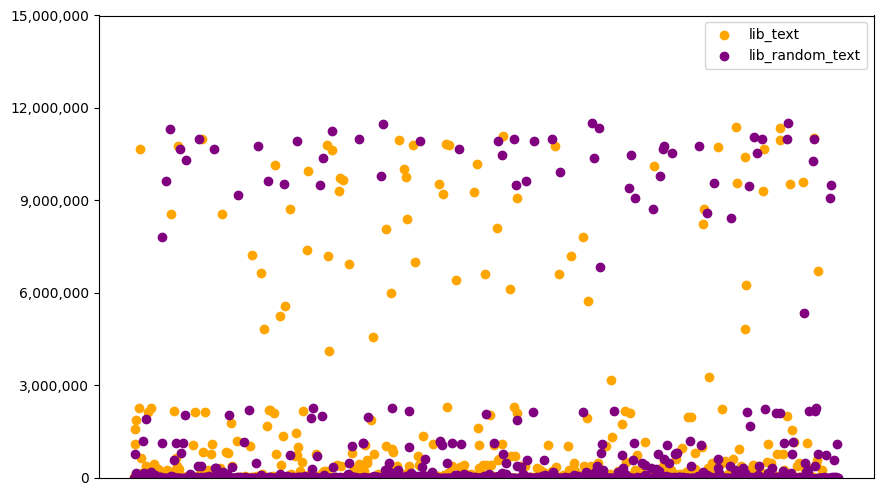

In [47]:
from os import readlink
import csv
import json
import matplotlib.pyplot as plt

# Чтение файла one_lib_text.json
lib_text = {}
with open('one_lib_text.json', 'r') as file:
    lib_text_data = json.load(file)
    for text_name, text_info in lib_texts_data.items():
        for text_details, text_other in text_info.items():
            if text_details == 'bigrams_unique':
                for bigram, bigram_scores in text_other.items():
                    rank = bigram_scores.get('rank')
                    lib_text[bigram] = rank

# Чтение файла one_lib_random_text.json
lib_random_text = {}
with open('one_lib_random_text.json', 'r') as file:
    lib_random_text_data = json.load(file)
    for text_name, text_info in lib_random_text_data.items():
        for text_type, text_other in text_info.items():
            if text_type == 'random_texts':
                for text_details, text_else in text_other.items():
                    for parameters, scores in text_else.items():
                        if parameters == 'bigrams_unique':
                            for bigram, bigram_scores in scores.items():
                                # print(bigram)
                                rank = bigram_scores.get('rank')
                                lib_random_text[bigram] = rank
# print(lib_random_text)
# Теперь у нас есть данные из всех файлов. Мы можем начать построение диаграммы.

# Получение уровней и их соответствующих цветов
levels_colors = {'lib_text': 'orange', 'lib_random_text': 'purple'}

# Построение диаграммы
plt.figure(figsize=(10, 6))

# Добавление точек из lib_texts
for i, (bigram, rank) in enumerate(lib_text.items()):
    plt.scatter(i, rank, color=levels_colors['lib_text'], label='lib_text', marker='o')

# Добавление точек из lib_random_texts
for i, (bigram, rank) in enumerate(lib_random_text.items()):
    plt.scatter(i, rank, color=levels_colors['lib_random_text'], label='lib_random_text', marker='o')

# Удаление подписей с оси x
plt.xticks([])

# Установка масштаба оси y
plt.ylim(0, 15000000)
plt.yticks([0, 3000000, 6000000, 9000000, 12000000, 15000000], ['0', '3,000,000', '6,000,000', '9,000,000', '12,000,000', '15,000,000'])

# Добавление легенды
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))
unique_handles = [handles[labels.index(label)] for label in unique_labels]
plt.legend(unique_handles, unique_labels)

# Показать диаграмму
plt.show()